# Declaration of Originality

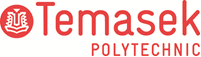

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Ng Hong Long (2401425J)
* Tutorial Group                : B01
* Tutor						    : Mr Srivastava Ruchir
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding


## 1.1 Defining the Real World Problem
E-commerce platforms struggle to identify high-intent users during a browsing session, resulting in missed conversion opportunities and inefficient allocation of marketing resources.

## 1.2 Translate Business Problem → ML Problem
To address this problem, the task is framed as a supervised binary classification problem, where the objective is to predict whether an active browsing session will result in a purchase (Revenue = True/False) based on user behaviour, engagement metrics, and session attributes.

## 1.3 Define Business Objective vs ML Objective
Business Objective
- Increase conversion rates and reduce wasted marketing spend by identifying high-intent users early.

ML Objective
- Build a predictive model that accurately distinguishes purchasing sessions from non-purchasing sessions, with particular emphasis on correctly identifying potential buyers.

## 1.4 Defining Success Critieria
Success Criteria
- The model should outperform a baseline classifier.
- It should achieve strong Recall and F1-score for the purchasing class.
- The model must generalise well and be deployable in a real-time web application.

## 1.5 Stakeholders & Impact
Target Users / Stakeholders
- E-commerce businesses and digital marketing teams seeking to improve conversion efficiency.
- Product managers optimising user experience and engagement strategies.

## 1.6 Dataset Justification
The Online Shoppers Purchasing Intention Dataset is sourced from the UCI Machine Learning Repository and is based on real user browsing sessions collected over a one-year period. It contains realistic behavioural metrics commonly used in industry analytics tools, making it suitable for real-world modelling and deployment.

## 1.7 Summary of Business Understanding
This project aims to solve a real-world e-commerce conversion problem by predicting purchase intention using supervised machine learning. By framing the task from both business and technical perspectives, the project ensures that subsequent data analysis, model development, and evaluation are aligned with practical deployment and business impact.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH= "C:\\Users\\Hong Long\\Downloads\\online_shoppers_intention.csv"
df = pd.read_csv(FILE_PATH)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### 2.1.1 Dataset Overview & Context
The Online Shoppers Purchasing Intention Dataset contains 12,330 user sessions collected over a one-year period, where each session corresponds to a unique user. The dataset includes behavioural metrics derived from real-time page interactions, engagement indicators, temporal features, and user attributes commonly used in e-commerce analytics.

The target variable Revenue indicates whether a browsing session resulted in a completed purchase, framing the task as a supervised binary classification problem.

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The data structure and data types of each feature are inspected to determine appropriate preprocessing strategies.

The output shows a mix of numerical, categorical, and boolean features. Numerical features represent session counts, durations, and behavioural metrics, while categorical and boolean features capture contextual information such as visitor type, month of visit, and whether the session occurred on a weekend.

Understanding the data types is essential for selecting suitable transformations, such as scaling for numerical features and encoding for categorical variables, in later preprocessing steps.


In [4]:
## Check for missing data
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Missing value analysis is performed to assess data completeness and determine whether imputation is required.

The results show that there are **no missing values** across all features in the dataset. This indicates good data quality and allows preprocessing to proceed without introducing imputed values that could distort the original data distribution.

As a result, no missing value imputation is applied during preprocessing.


In [5]:
## Get the shape of the DataFrame
df.shape

(12330, 18)

The dataset dimensions are examined to understand the overall scale of the data.

The dataset contains **12,330 rows**, where each row represents a unique user session, and **18 columns**, which include behavioural features, contextual attributes, and the target variable `Revenue`.

This confirms that the dataset meets the project requirement of having at least 1,000 samples and provides sufficient data for training and evaluating supervised machine learning models.

In [7]:
## Get summary statistics of the DataFrame
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Summary statistics are examined to understand the distribution, scale, and variability of numerical features.

The statistics reveal that several duration-related features, such as `ProductRelated_Duration`, exhibit high variance and right-skewed distributions. This suggests the presence of outliers, which likely correspond to highly engaged user sessions rather than data errors.

These observations inform subsequent preprocessing decisions, including the use of standardisation for numerical features and the retention of outliers to preserve meaningful behavioural patterns.


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [ ]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection